In [3]:
# importing libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import re

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from tensorflow import keras
from tensorflow.keras import layers
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics import tsaplots
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pathlib import Path
from datetime import timedelta
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from warnings import simplefilter
simplefilter('ignore')

In [108]:
# tensorflow version
tf.__version__

'2.14.0'

In [109]:
# matplotlib defualts
plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout = True)
plt.rc('axes', labelsize = 10, labelweight = 'bold', titlesize = 10, titleweight = 'bold', titlepad = 10)

In [110]:
# matplotlib configuration for higher images
%matplotlib inline
%config InlineBackend.figure_formats = 'retina'

In [111]:
df = pd.read_csv("train_1.csv")
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [12]:
# check for missing values
missing_values = df.isnull().sum()
missing_values

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
2016-12-27     3701
2016-12-28     3822
2016-12-29     3826
2016-12-30     3635
2016-12-31     3465
Length: 551, dtype: int64

In [13]:
df.shape

(145063, 551)

In [14]:
# total missing values
total_missing_values = missing_values.sum()
total_missing_values

6192931

In [15]:
# total datasets count present in the dataset
total_values = np.product(df.shape)
total_values

79929713

In [16]:
# total percent of missing values
percent = (total_missing_values / total_values) * 100
percent

7.747971020488964

In [17]:
# Data Cleaning with filling the missing values
df = df.fillna(0)
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [112]:
# calculating the dataframe
train_data = pd.melt(df,id_vars=['Page'],var_name='Date',value_name='Visits')
train_data.head()

,Page,Date,Visits
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,NaN


In [19]:
train_data.shape

(79784650, 3)

In [113]:
train_data['Date'] = pd.DatetimeIndex(train_data['Date'])
train_data.head()

,Page,Date,Visits
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,NaN


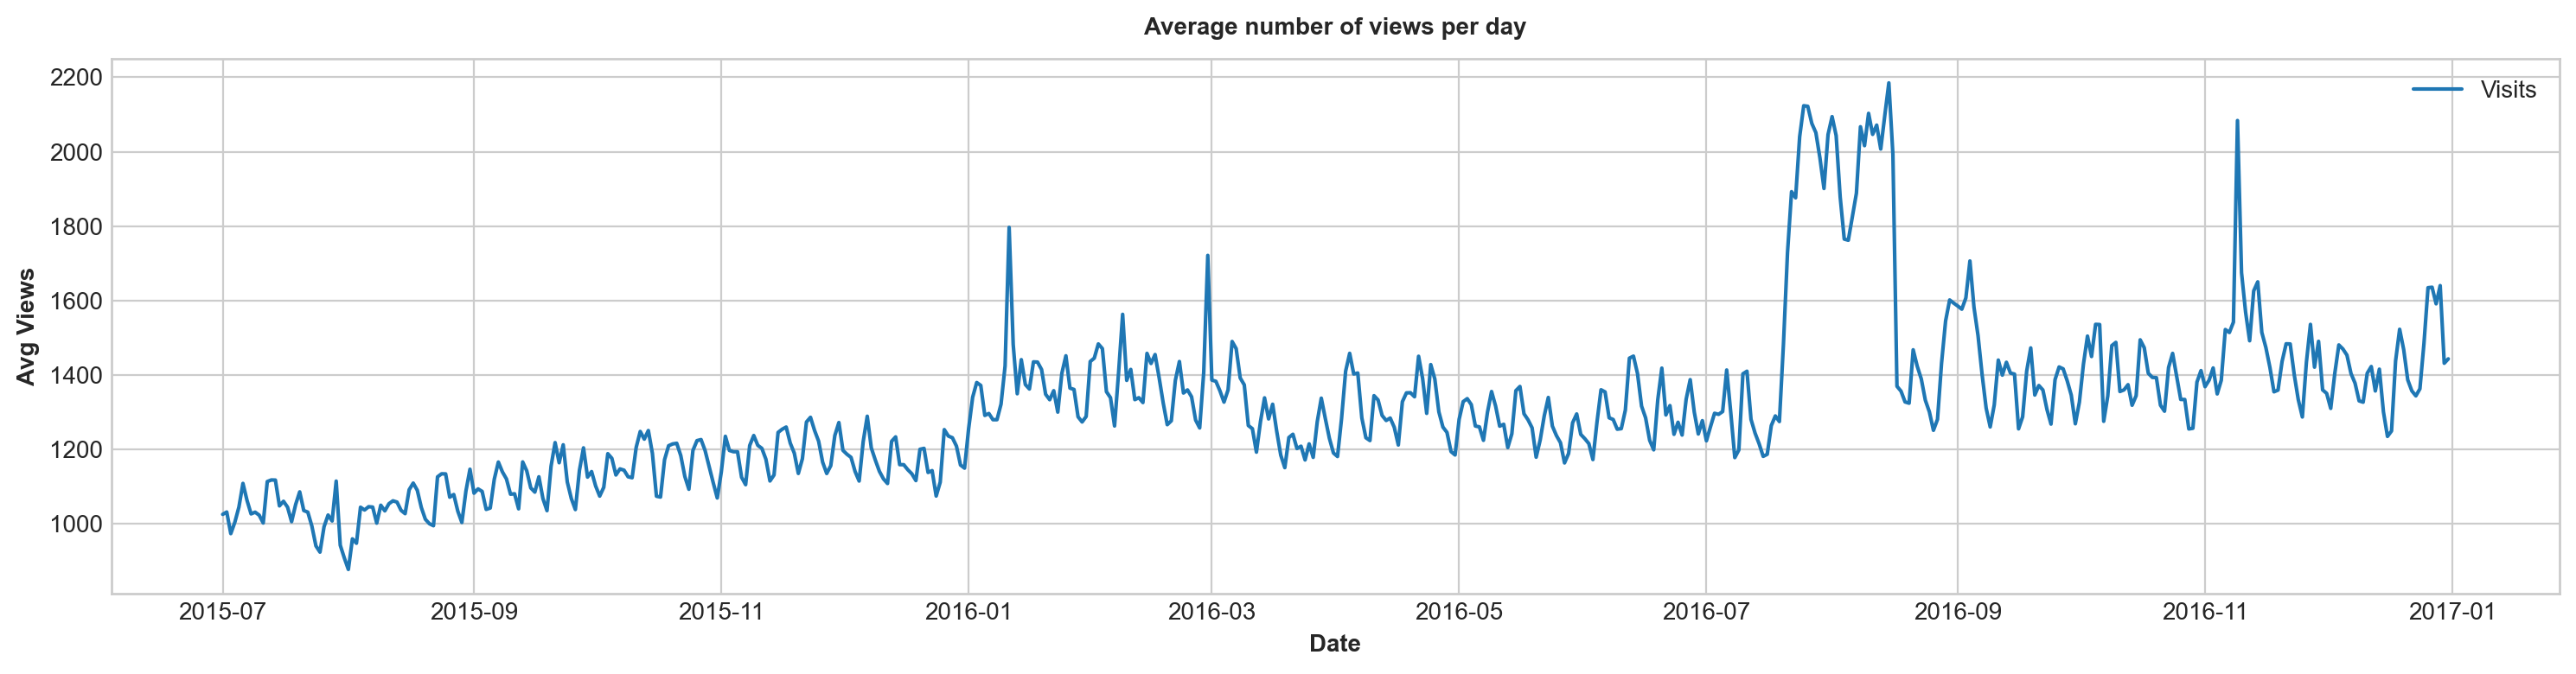

In [21]:
# Data Visualization
temp = train_data.groupby('Date')['Visits'].mean()
plt.figure(figsize = (15,4))
plt.xlabel('Date')
plt.ylabel('Avg Views')
plt.title('Average number of views per day')
plt.plot(temp,label='Visits')
plt.legend()
plt.show()

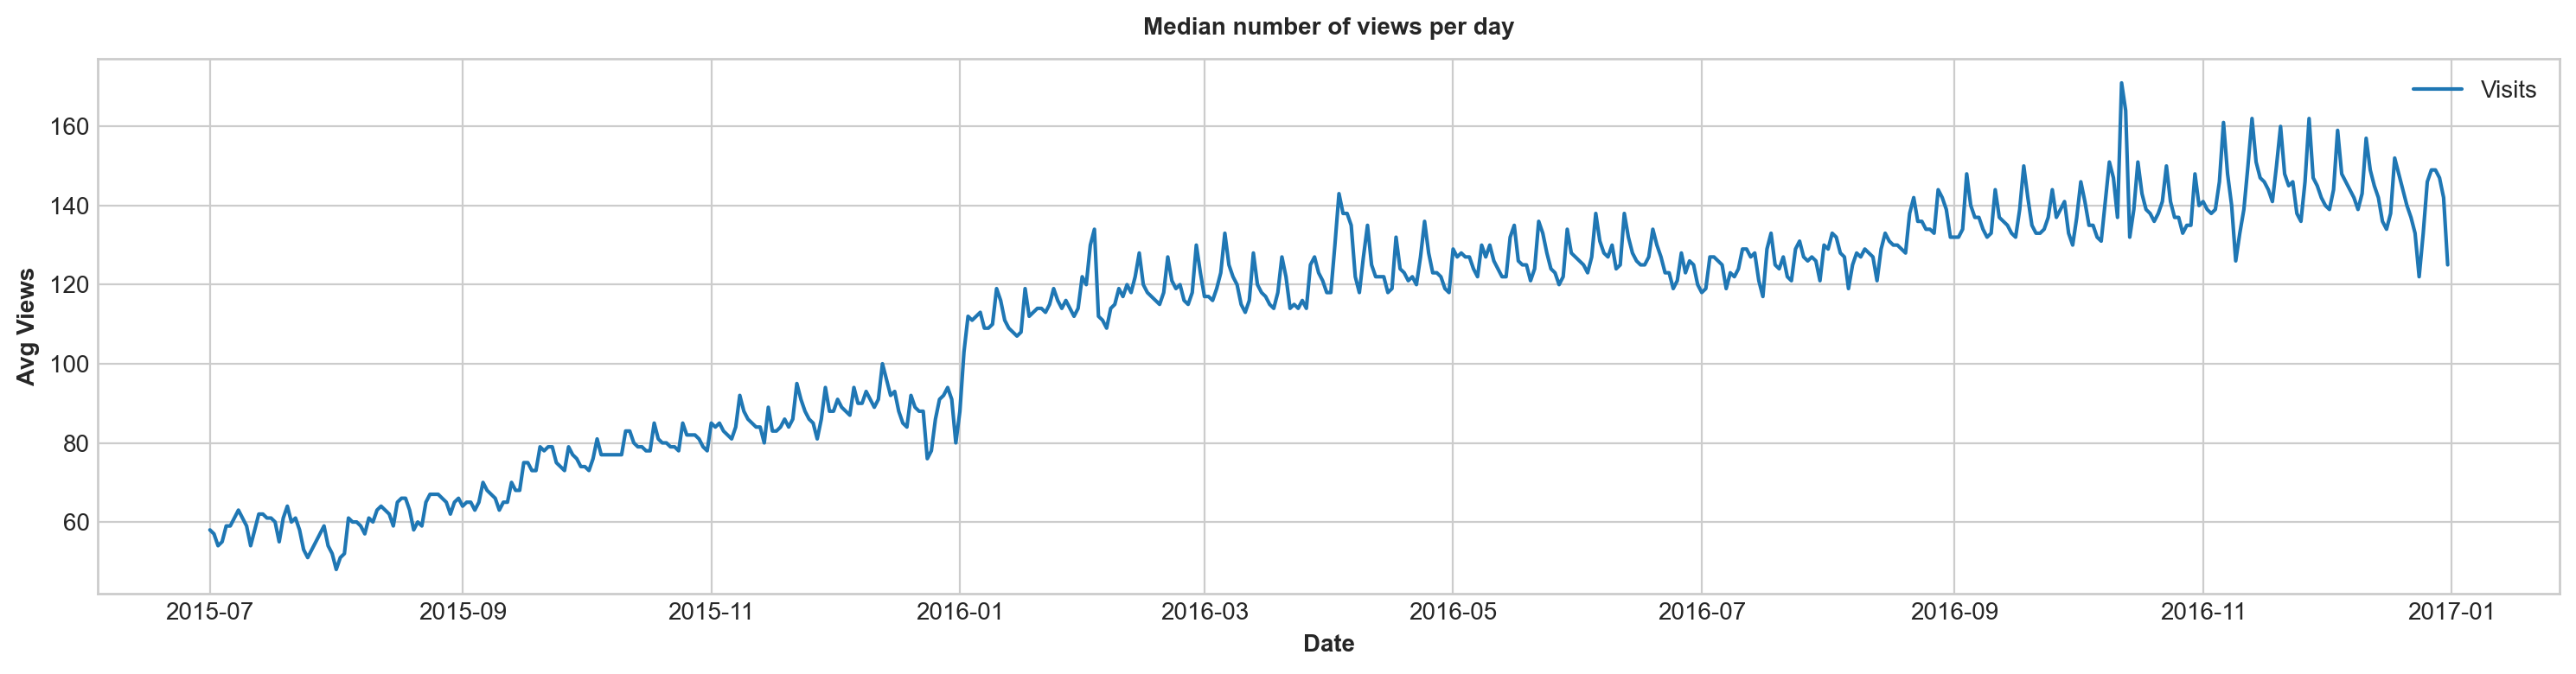

In [22]:
# Data Visualization
temp = train_data.groupby('Date')['Visits'].median()
plt.figure(figsize = (15,4))
plt.xlabel('Date')
plt.ylabel('Avg Views')
plt.title('Median number of views per day')
plt.plot(temp,label='Visits')
plt.legend()
plt.show()

In [114]:
train_data['year']=train_data.Date.dt.year
train_data['month']=train_data.Date.dt.month
train_data['day']=train_data.Date.dt.day

In [115]:
# plotting web traffic over the days of month using heatmap
train_data['month_num'] = train_data['month']
train_data['month'].replace('9','9 - September',inplace=True)
train_data['month'].replace('10','10 - October',inplace=True)
train_data['month'].replace('11','11 - November',inplace=True)
train_data['month'].replace('12','12 - December',inplace=True)

In [116]:
train_data.head()

,Page,Date,Visits,year,month,day,month_num
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0,2015,7,1,7
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0,2015,7,1,7
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0,2015,7,1,7
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0,2015,7,1,7
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,NaN,2015,7,1,7


In [117]:
train_data['weekday'] = train_data['Date'].apply(lambda x: x.weekday())

In [118]:
train_data['weekday#'] = train_data['weekday']
train_data['weekday'].replace(0,'01 - Monday',inplace=True)
train_data['weekday'].replace(1,'02 - Tuesday',inplace=True)
train_data['weekday'].replace(2,'03 - Wednesday',inplace=True)
train_data['weekday'].replace(3,'04 - Thursday',inplace=True)
train_data['weekday'].replace(4,'05 - Friday',inplace=True)
train_data['weekday'].replace(5,'06 - Saturday',inplace=True)
train_data['weekday'].replace(6,'07 - Sunday',inplace=True)

In [119]:
train_data.head()

,Page,Date,Visits,year,month,day,month_num,weekday,weekday#
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0,2015,7,1,7,03 - Wednesday,2
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0,2015,7,1,7,03 - Wednesday,2
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0,2015,7,1,7,03 - Wednesday,2
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0,2015,7,1,7,03 - Wednesday,2
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,NaN,2015,7,1,7,03 - Wednesday,2


In [121]:
train_group = train_data.groupby(["month", "weekday"])['Visits'].mean().reset_index()
train_group = train_group.pivot(index='weekday', columns='month',values='Visits')
train_group.sort_index(inplace=True)

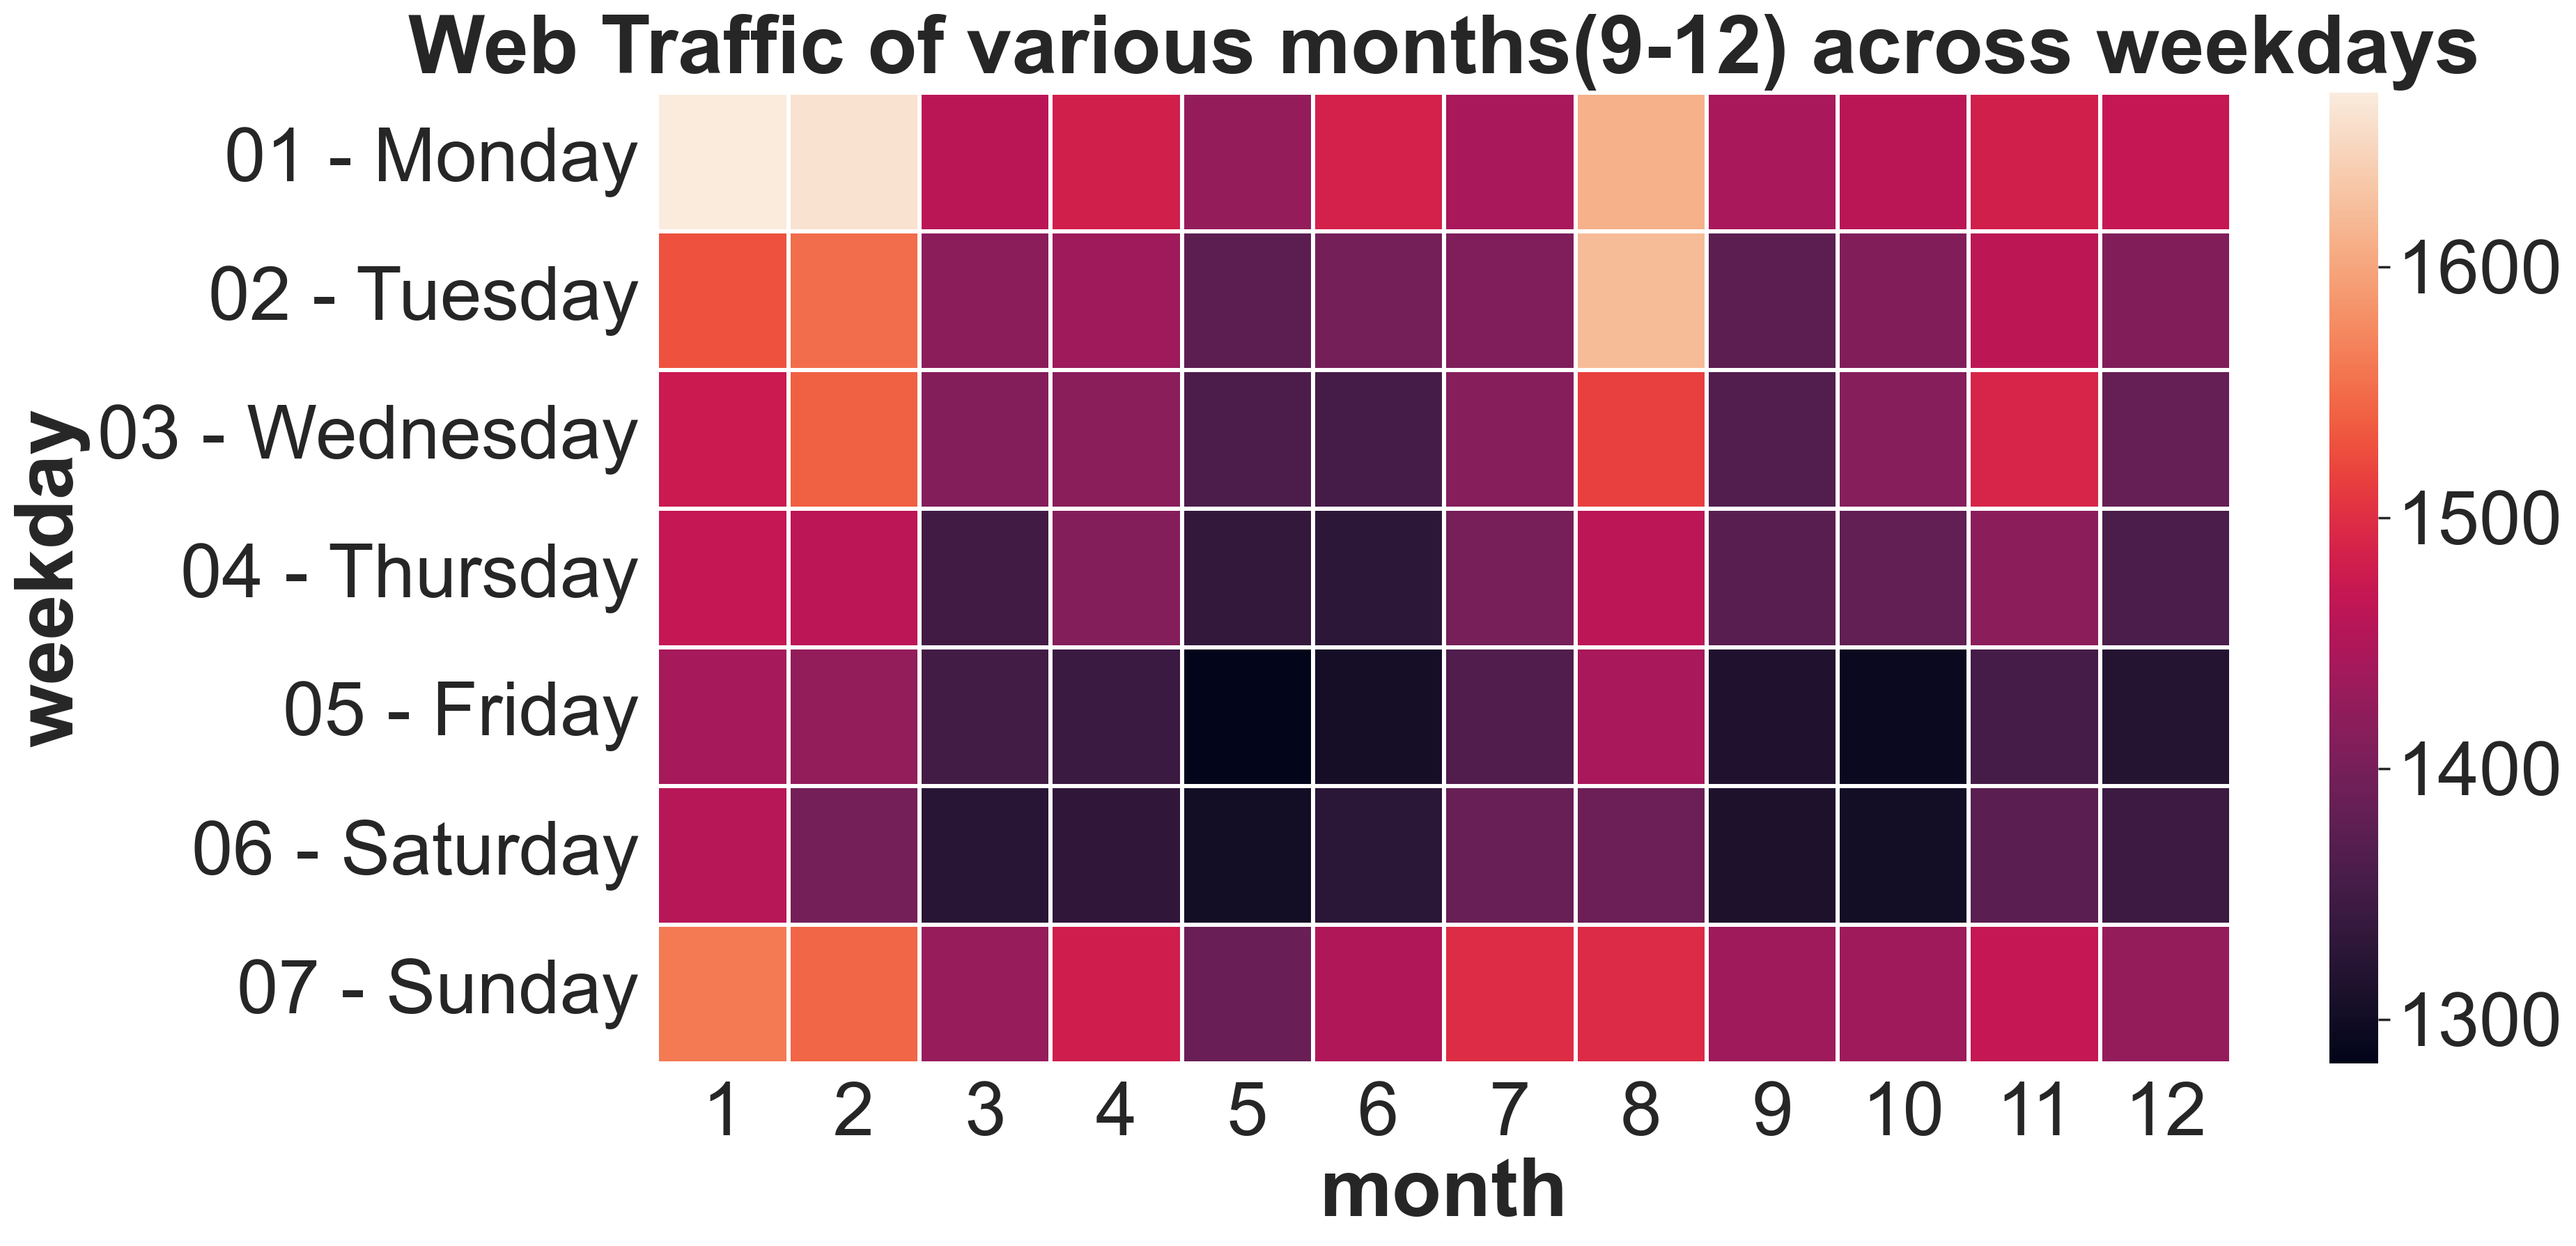

In [122]:
sns.set(font_scale=3.5)
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(train_group, annot=False, ax=ax, fmt="d", linewidths=2)
plt.title('Web Traffic of various months(9-12) across weekdays')
plt.show()

In [123]:
cols_to_drop = ['year','month','day','month_num','weekday','weekday','weekday#']
train_data.drop(cols_to_drop,axis=1,inplace=True)
train_data

,Page,Date,Visits
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,NaN
...,...,...,...
79784645,Underworld_(serie_de_películas)_es.wikipedia.o...,2016-12-31,10.0
79784646,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,2016-12-31,NaN
79784647,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,2016-12-31,NaN
79784648,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,2016-12-31,NaN


In [124]:
# top 10 pages with maximum number of views
top_pages = train_data.groupby('Page')['Visits'].sum().reset_index()
top_pages_list = top_pages.nlargest(10,'Visits')['Page'].tolist()

In [125]:
top5_pages_df = train_data[train_data['Page'].isin(top_pages_list)]
top5_pages_df.head()

,Page,Date,Visits
9774,Main_Page_en.wikipedia.org_desktop_all-agents,2015-07-01,11952559.0
10403,Special:Search_en.wikipedia.org_desktop_all-ag...,2015-07-01,1628266.0
27330,Wikipédia:Accueil_principal_fr.wikipedia.org_a...,2015-07-01,1620421.0
38573,Main_Page_en.wikipedia.org_all-access_all-agents,2015-07-01,20381245.0
39180,Special:Search_en.wikipedia.org_all-access_all...,2015-07-01,2034850.0


In [126]:
#detecting language across page
def detect_language(page):
    text = page.split('.wikipedia')
    if re.search('[a-z][a-z]',text[0][-2:]):
        return text[0][-2:]
    else:
        return 'none'

In [127]:
detect_language("Заглавная_страница_ru.wikipedia.org_all-access...")

'ru'

In [128]:
temp1 = train_data
temp1['Wikipedia_page'] = temp1.Page.apply(detect_language)

In [129]:
def lang_code(code):
    if code == 'zh':
        return 'Chinese'
    elif code == 'fr':
        return 'French'
    elif code == 'en':
        return 'English'
    elif code == 'ru':
        return 'Russian'
    elif code == 'de':
        return 'German'
    elif code == 'ja':
        return 'Japanese'
    elif code == 'es':
        return 'Spanish'
    else:
        return 'None'

In [130]:
temp1['Page_language'] = temp1.Wikipedia_page.apply(lang_code)

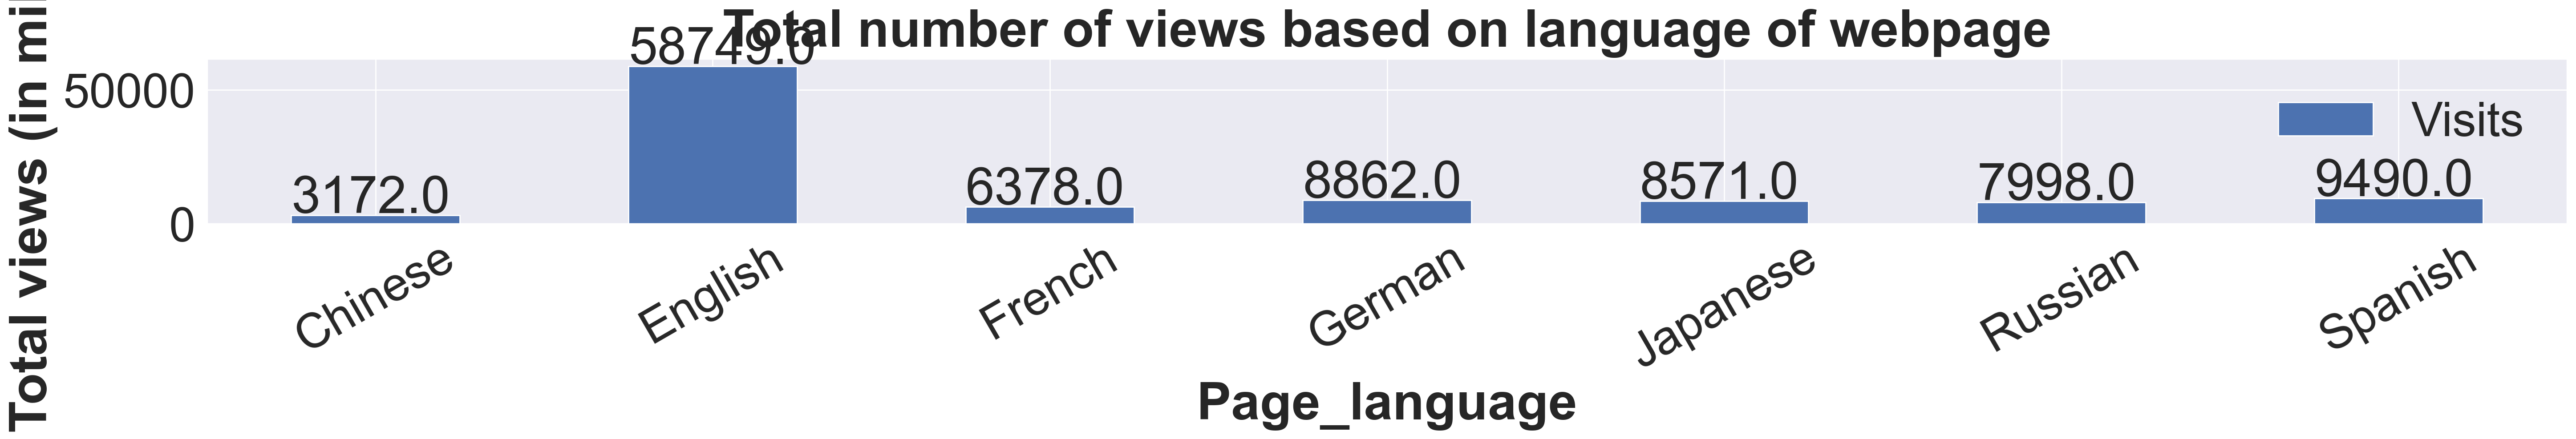

In [133]:
# Total number of views based on language of Wikipedia webpage
fig,ax = plt.subplots(figsize=(30,6))
lang_df = temp1.groupby('Page_language')['Visits'].sum().reset_index()
lang_df = lang_df[lang_df['Page_language']!='None']
lang_df['Visits'] = round(lang_df['Visits']/1000000,0)

bar_graph = lang_df.plot.bar(x='Page_language',y='Visits',rot=30,ax=ax)
bar_graph.set_ylabel('Total views (in millions)')
bar_graph.set_title('Total number of views based on language of webpage')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()+1000))
ax.legend()
plt.show()

In [134]:
top_pages = train_data.groupby('Page')['Visits'].sum().reset_index()
top_pages_list = top_pages.nlargest(10,'Visits')['Page'].tolist()
print(top_pages_list)

['Main_Page_en.wikipedia.org_all-access_all-agents', 'Main_Page_en.wikipedia.org_desktop_all-agents', 'Main_Page_en.wikipedia.org_mobile-web_all-agents', 'Wikipedia:Hauptseite_de.wikipedia.org_all-access_all-agents', 'Special:Search_en.wikipedia.org_all-access_all-agents']


In [135]:
top10_pages_df = train_data[train_data['Page'].isin(top_pages_list)]

In [136]:
top10_pages_df.head(10)

,Page,Date,Visits,Wikipedia_page,Page_language
9774,Main_Page_en.wikipedia.org_desktop_all-agents,2015-07-01,11952559.0,en,English
38573,Main_Page_en.wikipedia.org_all-access_all-agents,2015-07-01,20381245.0,en,English
39180,Special:Search_en.wikipedia.org_all-access_all...,2015-07-01,2034850.0,en,English
74114,Main_Page_en.wikipedia.org_mobile-web_all-agents,2015-07-01,8039732.0,en,English
139119,Wikipedia:Hauptseite_de.wikipedia.org_all-acce...,2015-07-01,2983623.0,de,German
154837,Main_Page_en.wikipedia.org_desktop_all-agents,2015-07-02,12344021.0,en,English
183636,Main_Page_en.wikipedia.org_all-access_all-agents,2015-07-02,20752194.0,en,English
184243,Special:Search_en.wikipedia.org_all-access_all...,2015-07-02,1984412.0,en,English
219177,Main_Page_en.wikipedia.org_mobile-web_all-agents,2015-07-02,8018607.0,en,English
284182,Wikipedia:Hauptseite_de.wikipedia.org_all-acce...,2015-07-02,2965848.0,de,German


In [137]:
# Time-series of page with maximum views
top_page_df = train_data[train_data.Page == top_pages_list[0]]
#top_page_df = top_page_df['Visits']
top_page_df['Visits'] = top_page_df['Visits'].div(1000000).round(2)
top_page_df.drop(['Page','Wikipedia_page','Page_language'],axis=1,inplace=True)
top_page_df.head()

,Date,Visits
38573,2015-07-01,20.38
183636,2015-07-02,20.75
328699,2015-07-03,19.57
473762,2015-07-04,20.44
618825,2015-07-05,20.77


In [138]:
top_page_df.reset_index(inplace=True)

In [139]:
top_page_df.head()

,index,Date,Visits
0,38573,2015-07-01,20.38
1,183636,2015-07-02,20.75
2,328699,2015-07-03,19.57
3,473762,2015-07-04,20.44
4,618825,2015-07-05,20.77


In [140]:
top_page_df.drop('index',axis=1,inplace=True)

In [141]:
top_page_df = top_page_df.set_index('Date')
top_page_df.head()

,Visits
Date,
2015-07-01,20.38
2015-07-02,20.75
2015-07-03,19.57
2015-07-04,20.44
2015-07-05,20.77


<Axes: xlabel='Date'>

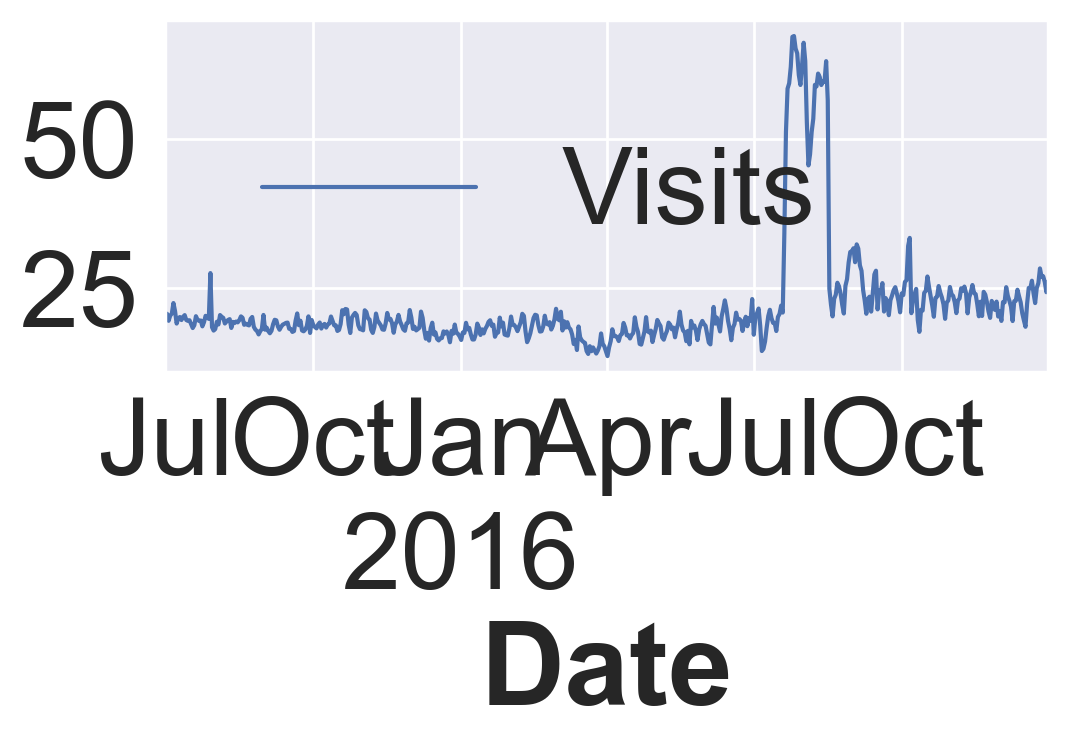

In [142]:
top_page_df.plot()

In [143]:
# Anamoly Detection
isolation_model = IsolationForest(contamination=0.5)
isolation_model.fit(top_page_df)
top_page_df['anomaly'] = isolation_model.predict(top_page_df)
top_page_df.head()

,Visits,anomaly
Date,,
2015-07-01,20.38,1
2015-07-02,20.75,-1
2015-07-03,19.57,1
2015-07-04,20.44,1
2015-07-05,20.77,1


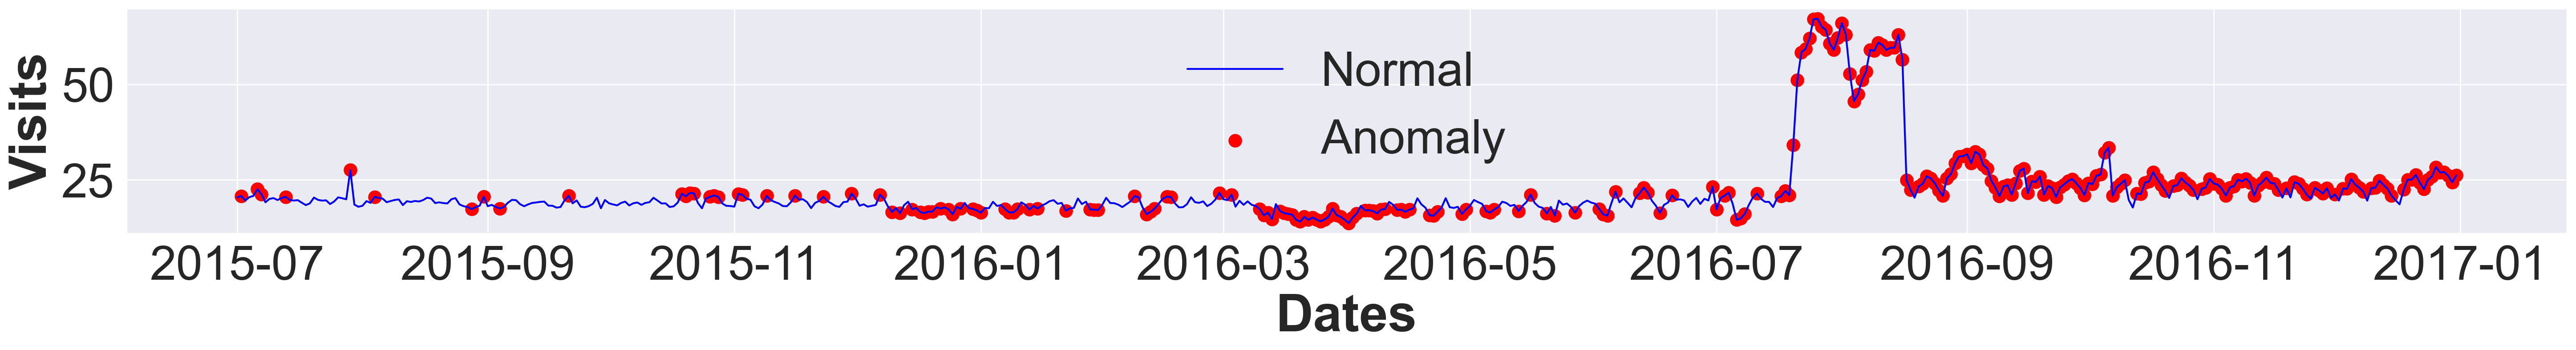

In [144]:
fig, ax = plt.subplots(figsize = (30,5))
anamoly_df = top_page_df.loc[top_page_df['anomaly'] == -1].copy()
ax.plot(top_page_df.index, top_page_df['Visits'], color = 'blue', label = 'Normal')
plt.scatter(anamoly_df.index, anamoly_df['Visits'], color = 'red', s = 100, label = 'Anomaly')
plt.xlabel('Dates')
plt.ylabel('Visits')
plt.legend()
plt.show()

<Figure size 3000x500 with 0 Axes>

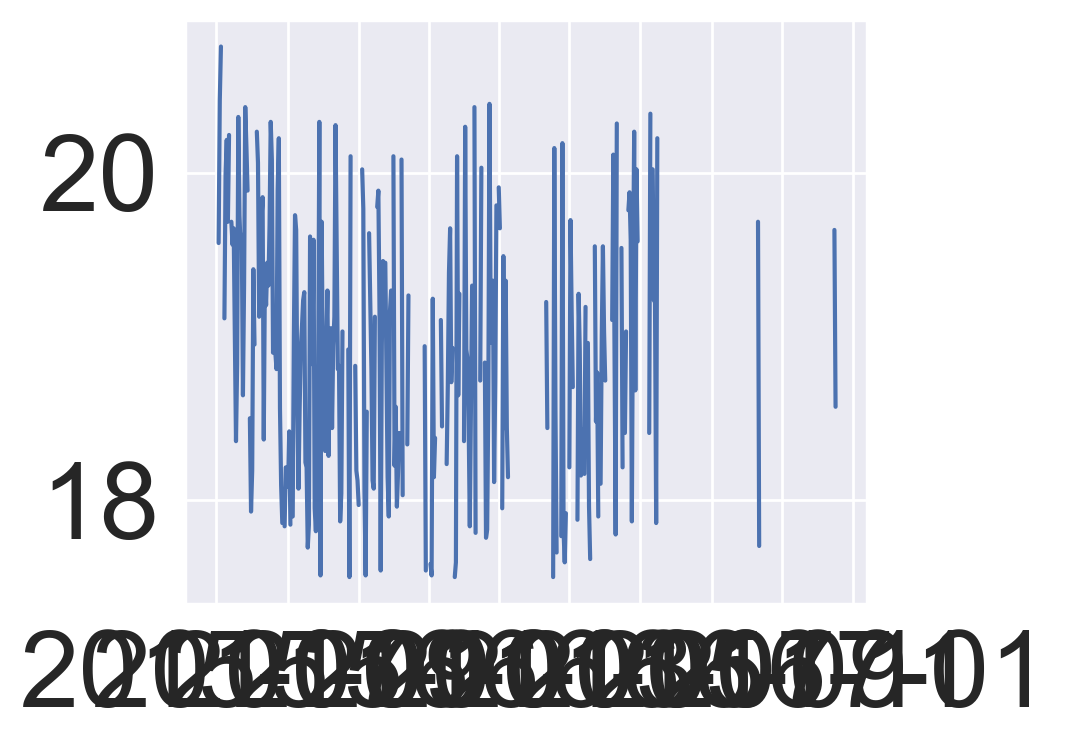

In [145]:
# remove anamolies from the data
top_page_df['new_visits'] = top_page_df.apply(lambda row: row.Visits if row.anomaly == 1 else None, axis ="columns")
plt.figure(figsize = (30, 5))
plt.show()
plt.plot(top_page_df.index, top_page_df.new_visits)

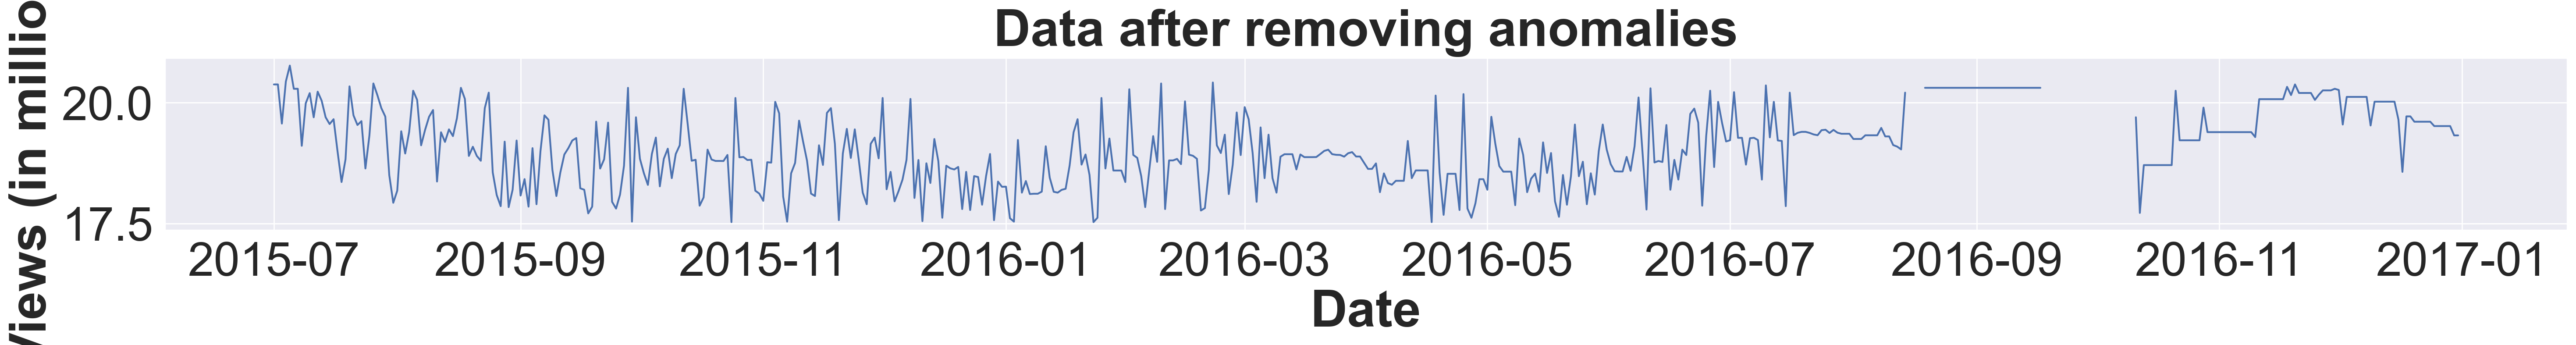

In [146]:
# Filling missing data with rolling mean
top_page_df = top_page_df.assign(rolling_mean=top_page_df.new_visits.fillna(top_page_df.new_visits.rolling(30,min_periods=1).mean()))

plt.figure(figsize=(30,5))
plt.plot(top_page_df.index,top_page_df.rolling_mean)
plt.title('Data after removing anomalies')
plt.xlabel('Date')
plt.ylabel('Views (in millions)')
plt.show()

In [147]:
top_page_df.head()

,Visits,anomaly,new_visits,rolling_mean
Date,,,,
2015-07-01,20.38,1,20.38,20.38
2015-07-02,20.75,-1,NaN,20.38
2015-07-03,19.57,1,19.57,19.57
2015-07-04,20.44,1,20.44,20.44
2015-07-05,20.77,1,20.77,20.77


In [148]:
top_page_df = top_page_df.drop(columns=['Visits','anomaly','new_visits']).rename(columns={'rolling_mean':'Views'})
top_page_df.head()

,Views
Date,
2015-07-01,20.38
2015-07-02,20.38
2015-07-03,19.57
2015-07-04,20.44
2015-07-05,20.77


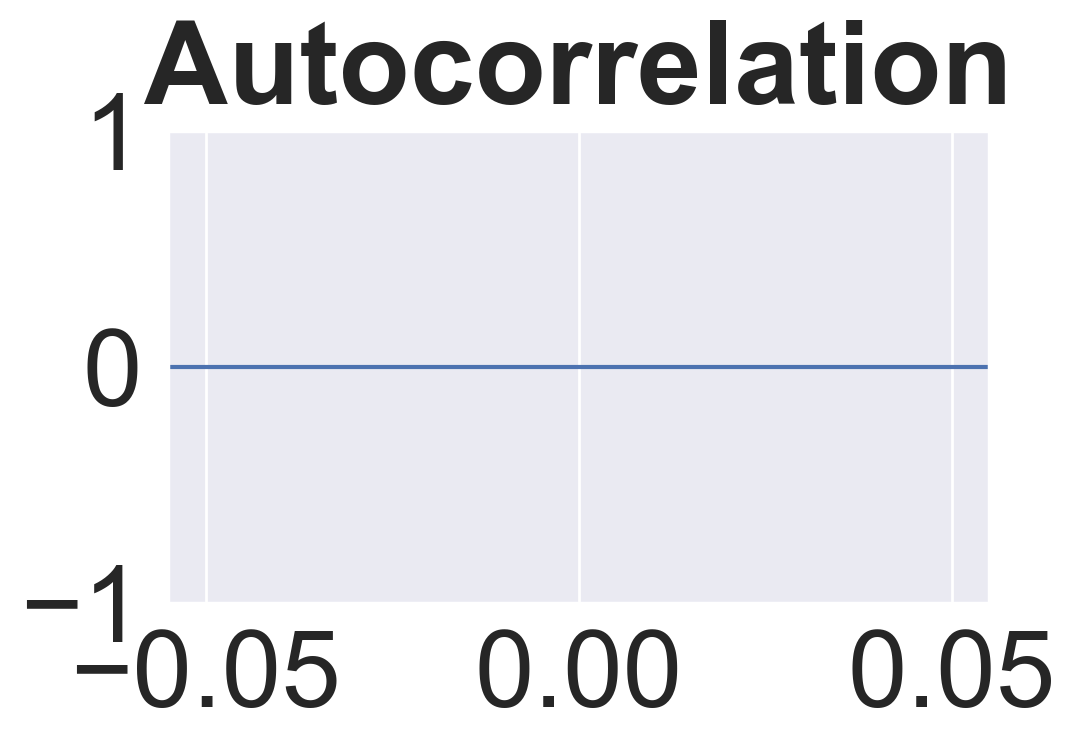

In [149]:
fig = tsaplots.plot_acf(top_page_df['Views'], lags=60)
plt.show()

In [150]:
top_page_df.head()

,Views
Date,
2015-07-01,20.38
2015-07-02,20.38
2015-07-03,19.57
2015-07-04,20.44
2015-07-05,20.77


In [151]:
top_page_df.isnull().sum()
top_page_df.dropna(axis = 0, how='any')

,Views
Date,
2015-07-01,20.380
2015-07-02,20.380
2015-07-03,19.570
2015-07-04,20.440
2015-07-05,20.770
...,...
2016-12-27,19.518
2016-12-28,19.518
2016-12-29,19.518


In [152]:
top_page_df.head()

,Views
Date,
2015-07-01,20.38
2015-07-02,20.38
2015-07-03,19.57
2015-07-04,20.44
2015-07-05,20.77


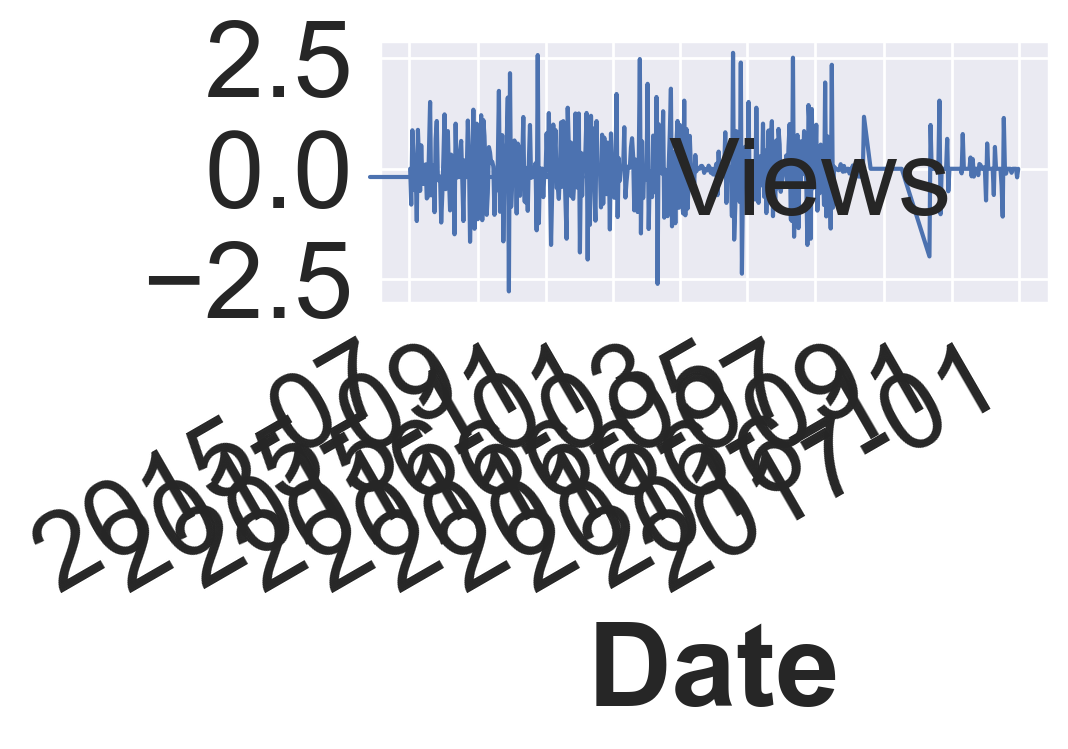

In [155]:
# Differencing the data to make it stationary
top_page_stationary_df = top_page_df.diff().dropna()
ax = top_page_stationary_df.plot()